# Object Detection with YOLOv5: Transfer Learning Using Coco Dataset ( Filtered for cars )
This project focuses on building an object detection model using YOLOv5 to detect cars in images. This notebook demonstrates the progress made, including:
- Dataset preparation
- Model training on a custom dataset
- Preliminary results

# Object Detection with YOLOv5 Using a Custom Dataset

### 1. Introduction 
- Brief overview of the project.  
  - **Objective:** Train a YOLOv5 model to detect cars using a subset of the COCO dataset.  
  - **Goal:** Deploy a web application for real-time object detection.
- Tool & Technologies:  
    - **Framework:** PyTorch, YOLOv5  
    - **Platform:** AWS SageMaker
Dataset: COCO (filtered for car class)

### 2. Progress Overview
- Dataset Preparation
  - The COCO datset was filtered to include only images labeled with the "car" class
  - Coco annotations were converted to YOLO format using a python script with multi-core processing to optimize the conversion process
  - Validation and training datasets were orginzied inot the apporopriate folder structure required for YOLOv5
- Model Training:
  - A pre-trained YOLOv5 model was fine0tuned on the car-only subset of COCO dataset
  - Transfer learning was used by frezzing the backbone layers and training only the detection head for 5-10 epochs
  - Traning log and results, such as lass values and visualizations of bounding boxes, have been generated to monitor progress
- Setup for Deployment
  - Sagemaker studio has been used for trainning and managing the model pipline
  - The trained model weights will be saved as best.pt, ready to be used in the web application

### 3. Next Steps
- Model Evaluation:
  - Evaluate the trained model's performace using metrics like percision, recall, and mAP
- Web Application development:
  - Backend: Use of an API endpoint for running inference with the trained YOLOv5 model
  - Frontend: Use React for the user interface, allowing users to upload images and or videos and vizualize predictions
  - Integration: Connect the backend model to the front end, enabling seamless interactions
- Deployment:
  - Deploy the web app to AWS using SageMaker Endpoints for inference or and EC2 instance with GPU support

### Please Note: This is an initial training run, intended as a practice to ensure the process works smoothly and everything is set up correctly. It is not the final training iteration.

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
# Paths
weights_path = "../yolov5/runs/train/exp5/weights/best.pt"  # Path to the best weights
val_images_dir = "../data/coco/images/val2017"   # Directory containing validation images
output_dir = "runs/detect"                       # Output directory for inference results
os.makedirs(output_dir, exist_ok=True)


In [23]:
# Define the correct paths
weights_path = "yolov5/runs/train/exp7/weights/best.pt"  # Path to trained weights
val_images_dir = "data/coco/images/val2017"             # Path to validation images

# Run inference
!python yolov5/detect.py --weights {weights_path} --img 640 --conf 0.25 --source {val_images_dir} --project yolov5/runs/detect --name val_results --exist-ok


detect: weights=['yolov5/runs/train/exp7/weights/best.pt'], source=data/coco/images/val2017, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=val_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.11.10 torch-2.3.1.post300 CUDA:0 (Tesla T4, 14918MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5000 /home/sagemaker-user/data/coco/images/val2017/000000000139.jpg: 448x640 (no detections), 38.3ms
image 2/5000 /home/sagemaker-user/data/coco/images/val2017/000000000285.jpg: 640x608 (no detections), 38.8ms
image 3/5000 /home/sagemaker-user/data/coco/images/val2017/0

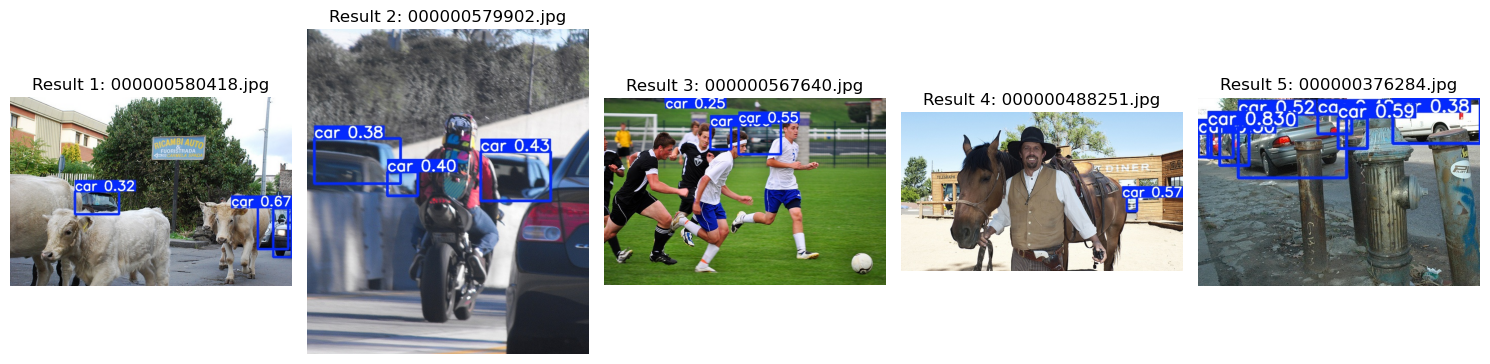

In [24]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the output directory
output_images_dir = "yolov5/runs/detect/val_results"

# List of specific image filenames to display
specific_images = ["000000580418.jpg", "000000579902.jpg", "000000567640.jpg", "000000488251.jpg", "000000376284.jpg"]  # Replace with your filenames

# Ensure the output directory exists
if os.path.exists(output_images_dir):
    # Check if the specific images exist in the directory
    existing_images = [img for img in specific_images if os.path.exists(os.path.join(output_images_dir, img))]

    if existing_images:
        # Display the specific images
        plt.figure(figsize=(15, 10))
        for i, img_name in enumerate(existing_images):
            img_path = os.path.join(output_images_dir, img_name)
            img = Image.open(img_path)
            plt.subplot(1, len(existing_images), i + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"Result {i+1}: {img_name}")
        plt.tight_layout()
        plt.show()
    else:
        print("No specified images found in the output directory.")
else:
    print(f"Output directory '{output_images_dir}' does not exist. Please check the path.")


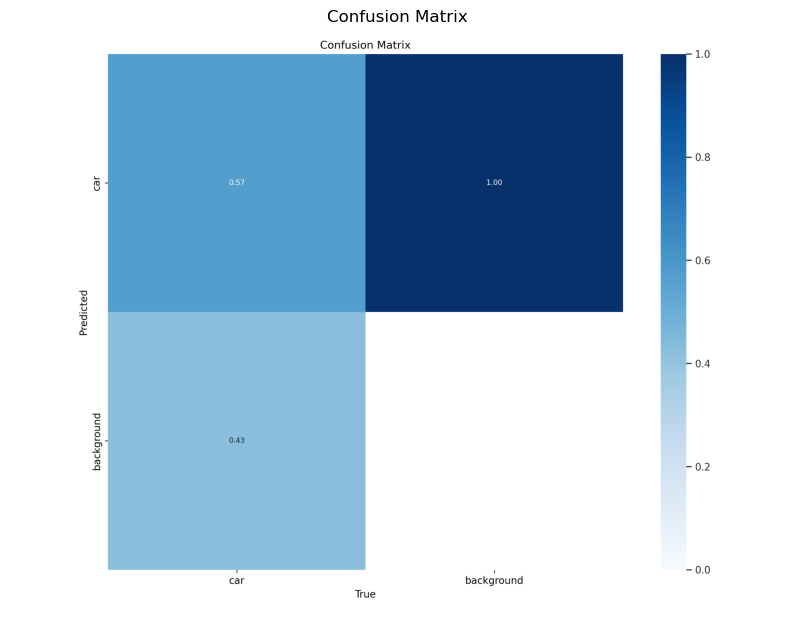

In [38]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the confusion matrix image
confusion_matrix_path = "yolov5/runs/train/exp7/confusion_matrix.png"  # Update the path if needed

# Load and display the image
img = Image.open(confusion_matrix_path)

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")  # Turn off axes for better visualization
plt.title("Confusion Matrix")
plt.show()


In [ ]:
python train.py --img 640 --batch 32 --epochs 2 --data coco_car.yaml --weights yolov5s.pt --freeze 10